In [68]:
# !pip install randomcolor
randomcolor.RandomColor().generate()[0]

'#c051d6'

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import randomcolor


In [4]:
# Study data files
sales_extended_path = "data/car_sales_extended.csv" #the combination of the two pinned .csv files… including model year, make, model, and price. The model year ranges from 1990 to 2020
car_sales_path = "data/car_sales_clean.csv" #just the original csv without null values and an additional, simplified ‘type’ column added to the end

# Read the mouse data and the study results
sales_extended = pd.read_csv(sales_extended_path)
car_sales = pd.read_csv(car_sales_path)


In [5]:
sales_extended

,Year,Make,Model,Price (USD)
0,2015,Kia,Sorento,21500.00
1,2015,Kia,Sorento,21500.00
2,2014,BMW,3 Series,30000.00
3,2015,Volvo,S60,27750.00
4,2014,BMW,6 Series Gran Coupe,67000.00
...,...,...,...,...
482320,2018,BMW,3 Series,31676.02
482321,2011,Hyundai,Sonata,67942.46
482322,2011,Chevrolet,Impala,64342.88
482323,2020,BMW,X3,50060.30


In [11]:
sales_extended.columns

Index(['Year', 'Make', 'Model', 'Price (USD)'], dtype='object')

In [28]:
sales_extended['Make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

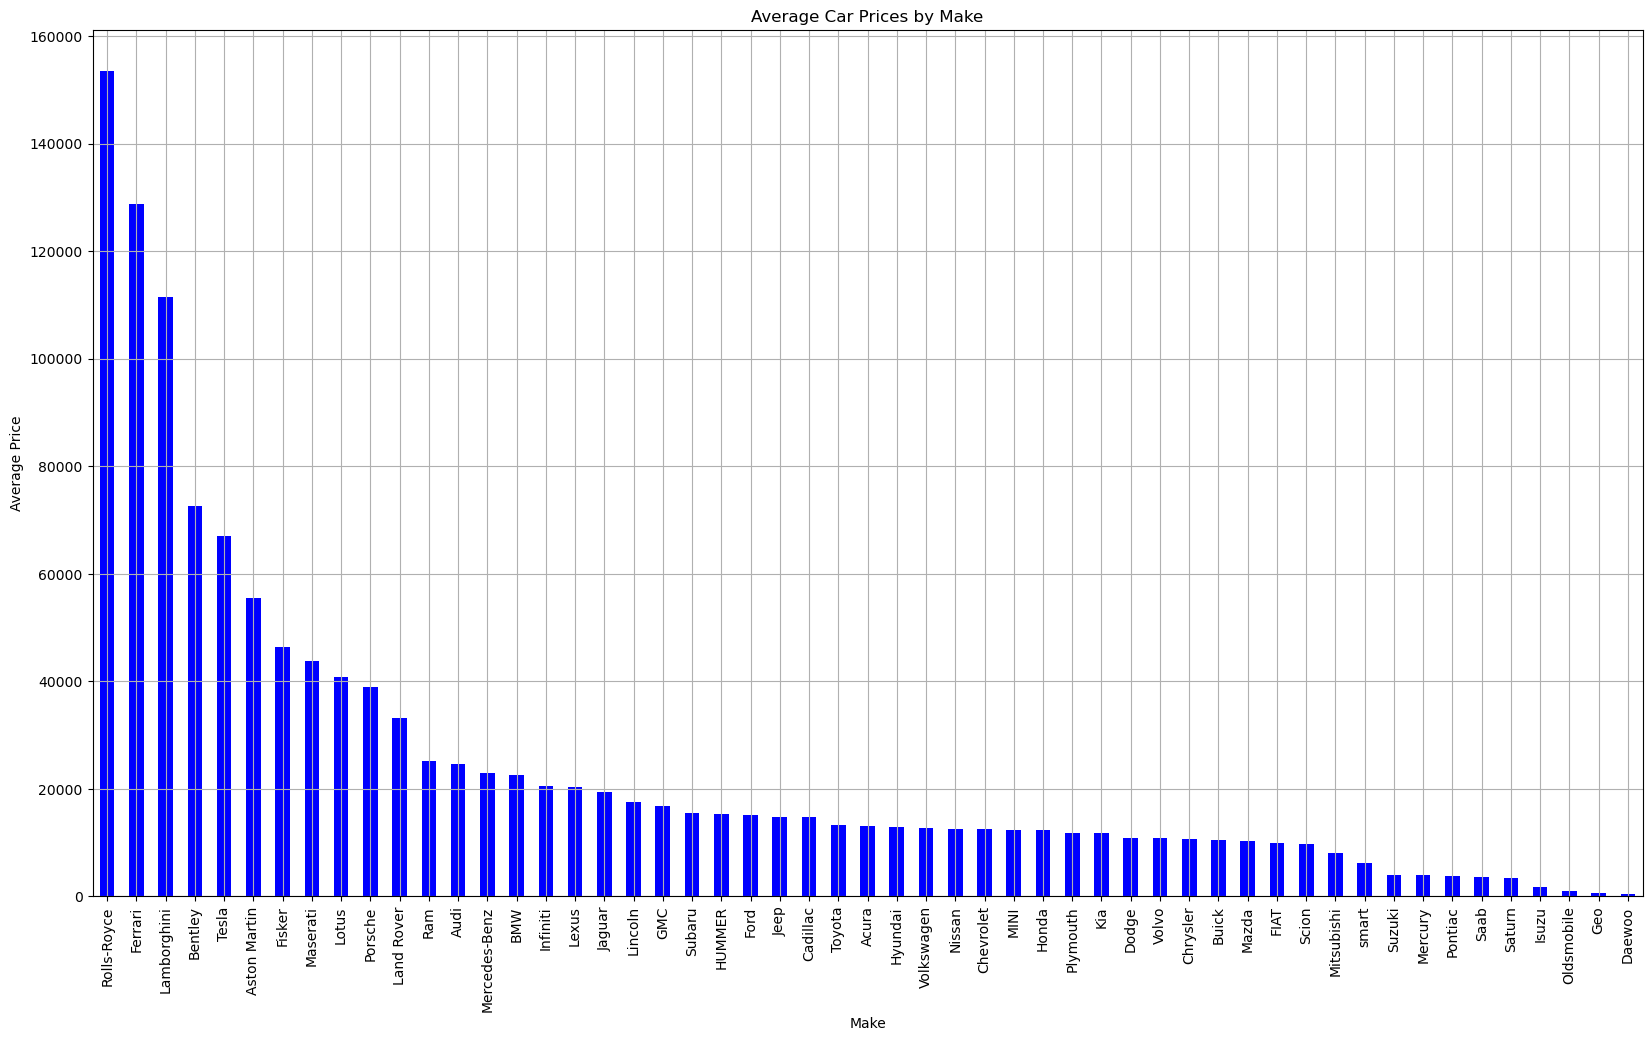

In [48]:
# Calculate average prices by brand

average_prices_by_make = sales_extended.groupby('Make')['Price (USD)'].mean().sort_values(ascending=False)

# Create a bar chart for average car prices by brand

plt.figure(figsize=(20,11.25))

average_prices_by_make.plot(kind='bar', color='blue', alpha=1, align='center')

plt.title('Average Car Prices by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
# plt.tight_layout()

In [70]:
line_data_df = sales_extended[['Year', 'Price (USD)','Make']].copy()
line_data_df = line_data_df.groupby(['Year', 'Make']).mean().reset_index()
line_data_df


,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
...,...,...,...
903,2020,Hyundai,48053.725727
904,2020,Mercedes-Benz,48580.367176
905,2020,Nissan,46306.973452
906,2020,Toyota,49476.110833


In [98]:
#we want to the car makes that have a 1990 year 
line_data_df[line_data_df["Year"]==1990]


,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
5,1990,Mazda,1565.000000
6,1990,Mercedes-Benz,275.000000
7,1990,Nissan,200.000000
8,1990,Toyota,400.000000


In [61]:
#we want to gauge what car makes would this consit of 
car_makes = line_data_df[line_data_df["Year"]==1990]['Make'].unique().tolist()
car_makes


['Cadillac',
 'Chevrolet',
 'Honda',
 'Jaguar',
 'Lexus',
 'Mazda',
 'Mercedes-Benz',
 'Nissan',
 'Toyota']

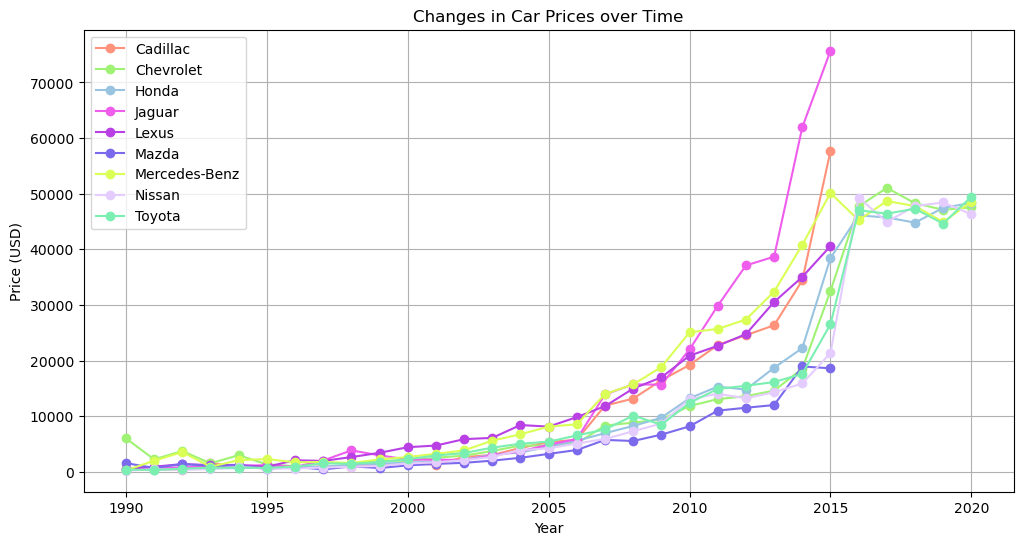

In [78]:
#Line Plot - Changes in Car Prices over Time
plt.figure(figsize=(12, 6)) 
for make in car_makes: 
    temp_df = line_data_df[line_data_df['Make']==make] 
    color = randomcolor.RandomColor().generate()[0] 
    plt.plot(temp_df['Year'], temp_df['Price (USD)'], marker='o', color=color, label=make) 
plt.title('Changes in Car Prices over Time')
plt.xlabel('Year') 
plt.ylabel('Price (USD)') 
plt.legend()
plt.grid(True) 
plt.show()

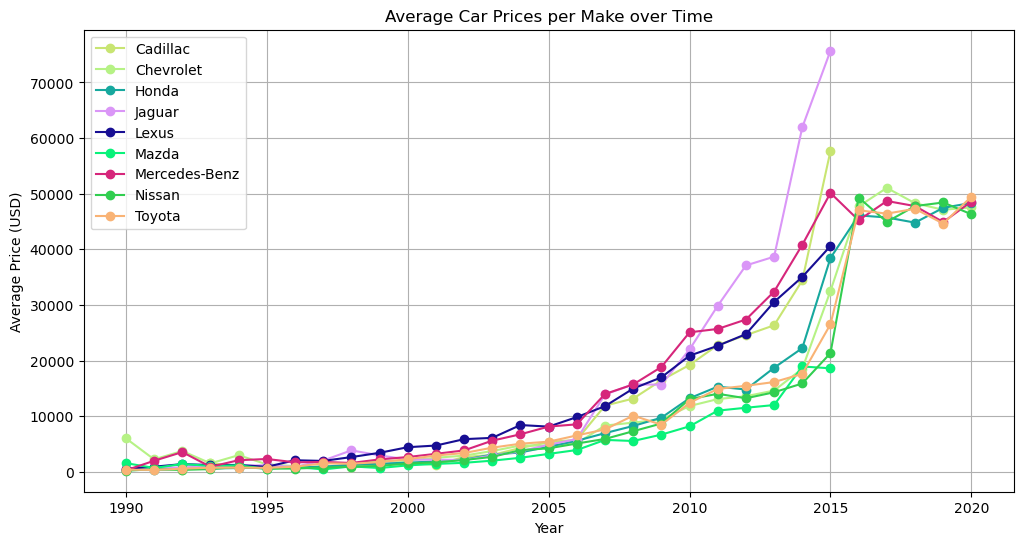

In [73]:
# Calculate average price per make
average_prices = line_data_df.groupby('Make')['Price (USD)'].mean()

# Plot average prices for each make over time
plt.figure(figsize=(12, 6))
for make in car_makes:
    color = randomcolor.RandomColor().generate()[0]
    plt.plot(line_data_df[line_data_df['Make']==make]['Year'], 
             line_data_df[line_data_df['Make']==make]['Price (USD)'], 
             marker='o', color=color, label=make)

plt.title('Average Car Prices per Make over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Initialize variables to store maximum price increase per make
max_price_increase_per_make = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the maximum price increase for the current make
    max_increase = line_data_df_make['Price Change'].max()
    
    # Store the maximum price increase for the current make
    max_price_increase_per_make[make] = max_increase

# Print the maximum price increase for each make
for make, max_increase in max_price_increase_per_make.items():
    print(f"The maximum price increase for {make} is: {max_increase}")

The maximum price increase for Cadillac is: 23278.238839882382
The maximum price increase for Chevrolet is: 15196.976178148776
The maximum price increase for Honda is: 16204.276349464864
The maximum price increase for Jaguar is: 23263.26171987345
The maximum price increase for Lexus is: 5774.195675861676
The maximum price increase for Mazda is: 6935.163981302008
The maximum price increase for Mercedes-Benz is: 9318.834397946659
The maximum price increase for Nissan is: 27960.76320760331
The maximum price increase for Toyota is: 20485.7086798851


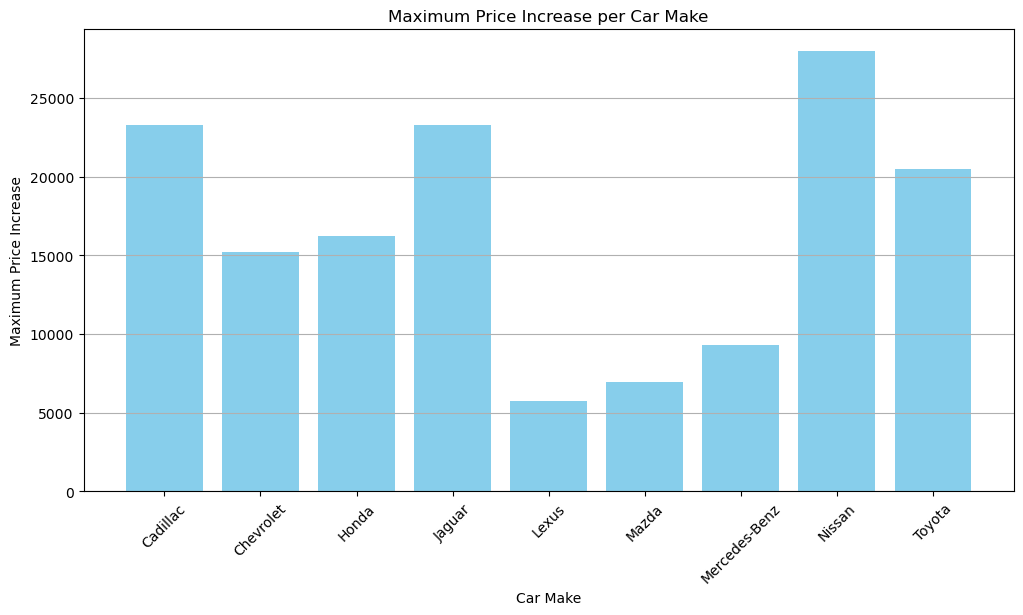

The maximum price increase for Cadillac is: 23278.238839882382
The maximum price increase for Chevrolet is: 15196.976178148776
The maximum price increase for Honda is: 16204.276349464864
The maximum price increase for Jaguar is: 23263.26171987345
The maximum price increase for Lexus is: 5774.195675861676
The maximum price increase for Mazda is: 6935.163981302008
The maximum price increase for Mercedes-Benz is: 9318.834397946659
The maximum price increase for Nissan is: 27960.76320760331
The maximum price increase for Toyota is: 20485.7086798851


In [90]:

# Initialize variables to store maximum price increase per make
max_price_increase_per_make = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the maximum price increase for the current make
    max_increase = line_data_df_make['Price Change'].max()
    
    # Store the maximum price increase for the current make
    max_price_increase_per_make[make] = max_increase

# Plot the maximum price increase for each make
plt.figure(figsize=(12, 6))
plt.bar(max_price_increase_per_make.keys(), max_price_increase_per_make.values(), color='skyblue')
plt.title('Maximum Price Increase per Car Make')
plt.xlabel('Car Make')
plt.ylabel('Maximum Price Increase')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Print the maximum price increase for each make
for make, max_increase in max_price_increase_per_make.items():
    print(f"The maximum price increase for {make} is: {max_increase}")

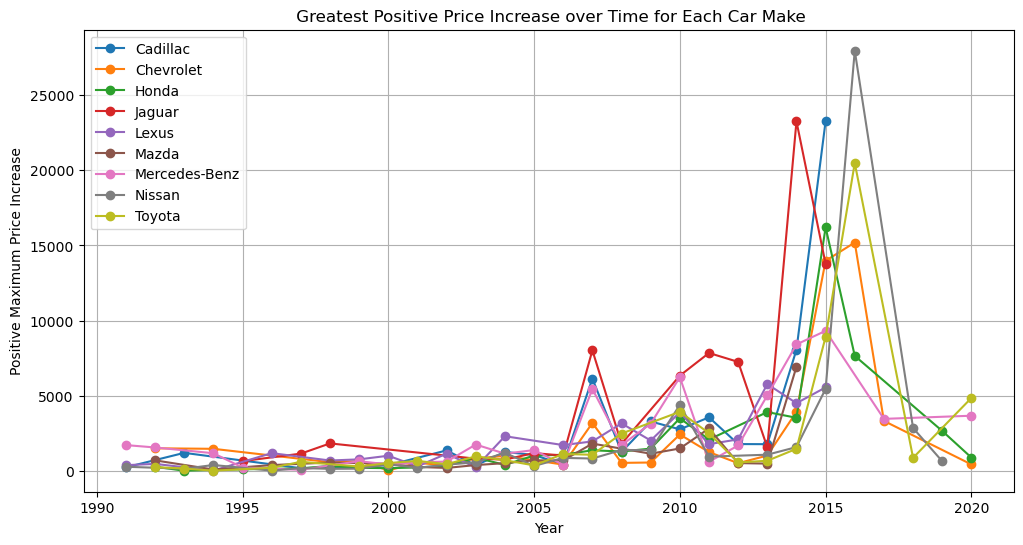

In [100]:
# Initialize variables to store positive maximum price increase per make over time
positive_max_price_increase_per_make_over_time = {}

for make in car_makes:
    # Calculate price change over time for the current make
    line_data_df_make = line_data_df[line_data_df['Make'] == make].copy()  # Create a copy of the DataFrame
    line_data_df_make['Price Change'] = line_data_df_make['Price (USD)'].diff()
    
    # Find the positive maximum price increase for each year for the current make
    max_increase_per_year = line_data_df_make.groupby('Year')['Price Change'].max()
    positive_max_increase_per_year = max_increase_per_year[max_increase_per_year > 0]  # Consider only positive values
    
    # Store the positive maximum price increase for each year for the current make
    positive_max_price_increase_per_make_over_time[make] = positive_max_increase_per_year

# Plot the changes in positive maximum price increase over time for each make
plt.figure(figsize=(12, 6))
for make, positive_max_increase_per_year in positive_max_price_increase_per_make_over_time.items():
    plt.plot(positive_max_increase_per_year.index, positive_max_increase_per_year.values, marker='o', label=make)

plt.title(' Greatest Positive Price Increase over Time for Each Car Make')
plt.xlabel('Year')
plt.ylabel('Positive Maximum Price Increase')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# # Initialize variables to store outliers per make
# outliers_per_make = {}

# for make in car_makes:
#     # Filter data for the current make
#     line_data_df_make = line_data_df[line_data_df['Make'] == make]
    
#     # Create a box plot to identify outliers for the current make
#     plt.figure(figsize=(8, 6))
#     plt.boxplot(line_data_df_make['Price (USD)'], vert=False)
#     plt.title(f'Price Distribution for {make}')
#     plt.xlabel('Price (USD)')
#     plt.grid(True)
#     plt.show()
    
#     # Find outliers for the current make
#     q1 = line_data_df_make['Price (USD)'].quantile(0.25)
#     q3 = line_data_df_make['Price (USD)'].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
    
#     outliers = line_data_df_make[(line_data_df_make['Price (USD)'] < lower_bound) | (line_data_df_make['Price (USD)'] > upper_bound)]
#     outliers_per_make[make] = outliers

# # Print outliers for each make
# for make, outliers in outliers_per_make.items():
#     print(f"Outliers for {make}:")
#     print(outliers)

In [94]:
# # Create a multiplot for box plots of price distribution for each car make
# fig, axs = plt.subplots(len(car_makes), 1, figsize=(10, 6*len(car_makes)))

# for idx, make in enumerate(car_makes):
#     # Filter data for the current make
#     line_data_df_make = line_data_df[line_data_df['Make'] == make]
    
#     # Create a box plot to identify outliers for the current make
#     axs[idx].boxplot(line_data_df_make['Price (USD)'], vert=False)
#     axs[idx].set_title(f'Price Distribution for {make}')
#     axs[idx].set_xlabel('Price (USD)')
#     axs[idx].grid(True)

# plt.tight_layout()
# plt.show()

In [6]:
car_sales

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT),Sedan
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Truck
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),SUV
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Sedan


In [9]:
car_sales.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'type'],
      dtype='object')

In [96]:
car_sales['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [97]:
data_df = car_sales[['year', 'sellingprice','make']].copy()
data_df = line_data_df.groupby(['Year', 'Make']).mean().reset_index()
data_df

,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
...,...,...,...
903,2020,Hyundai,48053.725727
904,2020,Mercedes-Benz,48580.367176
905,2020,Nissan,46306.973452
906,2020,Toyota,49476.110833


In [99]:
line_data_df[line_data_df["Year"]==1990]


,Year,Make,Price (USD)
0,1990,Cadillac,325.000000
1,1990,Chevrolet,6020.000000
2,1990,Honda,357.142857
3,1990,Jaguar,550.000000
4,1990,Lexus,545.000000
5,1990,Mazda,1565.000000
6,1990,Mercedes-Benz,275.000000
7,1990,Nissan,200.000000
8,1990,Toyota,400.000000
